### Machine Learning Project

#### Preprocessing

In [65]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [66]:
data = pd.read_csv('./data.csv')

In [67]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [69]:
#dropping the unused column
data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id",axis=1,inplace=True)

In [70]:
data.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

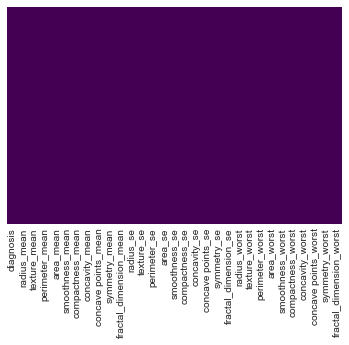

In [71]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [72]:
corr = data.corr(method="pearson")

In [73]:
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [74]:
from sklearn.preprocessing import LabelEncoder
y = data.diagnosis.values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [75]:
le.transform(['B', 'M'])

array([0, 1])

In [76]:
#dropping the y column from x
x = data.drop(['diagnosis'],axis=1)

In [77]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [78]:
y[:5]

array([1, 1, 1, 1, 1])

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [92]:
#Apply StandardScaler and Pca to the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
stdsc = StandardScaler()
pca = PCA()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
x_train = pca.fit_transform(X_train_std)
x_test = pca.transform(X_test_std)

### Model Selection

In [ ]:
#Rough

In [95]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predicted_log = logmodel.predict(x_test)


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_log))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99        72
          1       0.98      0.98      0.98        42

avg / total       0.98      0.98      0.98       114



In [97]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
predicted_tree = tree.predict(x_test)

In [98]:
print(classification_report(y_test,predicted_tree))

             precision    recall  f1-score   support

          0       0.94      0.89      0.91        72
          1       0.83      0.90      0.86        42

avg / total       0.90      0.89      0.90       114



In [119]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predicted_rfc = rfc.predict(x_test)
print(classification_report(y_test,predicted_rfc))

             precision    recall  f1-score   support

          0       0.93      0.94      0.94        72
          1       0.90      0.88      0.89        42

avg / total       0.92      0.92      0.92       114



In [124]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
predicted_ada = ada.predict(x_test)
print(classification_report(y_test,predicted_ada))

             precision    recall  f1-score   support

          0       0.96      0.97      0.97        72
          1       0.95      0.93      0.94        42

avg / total       0.96      0.96      0.96       114



In [128]:
y_pred_ad_train = ada.predict(x_train)

In [99]:
#Perform GridSearchCV to find suitable parameters
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [125]:
#pipeline for logistic regression
pipe_lr = make_pipeline(LogisticRegression(random_state=1))

param_grid_lr = [{'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}]

gs_lr = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid_lr, 
                  scoring='accuracy', 
                  cv=10,
                  refit=True)

gs_lr = gs_lr.fit(x_train, y_train)

print(gs_lr.best_score_)
print(gs_lr.best_params_)

#pipeline for decision tree
pipe_dt = make_pipeline(DecisionTreeClassifier(random_state=1))

param_grid_dt = [{'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
               'decisiontreeclassifier__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]}]

gs_dt = GridSearchCV(estimator=pipe_dt,
                  param_grid=param_grid_dt,
                  scoring='accuracy',
                  cv=10,
                  refit=True)

gs_dt = gs_dt.fit(X_train_std, y_train)

print(gs_dt.best_score_)
print(gs_dt.best_params_)

#pipeline for ensemble (RFC)
pipe_rf = make_pipeline(RandomForestClassifier())

param_grid_rf = [{'randomforestclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
               'randomforestclassifier__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]}]

gs_rf = GridSearchCV(estimator=pipe_rf,
                  param_grid=param_grid_rf,
                  scoring='accuracy',
                  cv=10,
                  refit=True)

gs_rf = gs_rf.fit(X_train_std, y_train)

print(gs_rf.best_score_)
print(gs_rf.best_params_)

0.9824175824175824
{'logisticregression__C': 0.1}
0.9582417582417583
{'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 4}
0.9582417582417583
{'randomforestclassifier__max_depth': 7, 'randomforestclassifier__min_samples_leaf': 2}


In [126]:
#pick best est
best_lr = gs_lr.best_estimator_
best_dt = gs_dt.best_estimator_
best_rf = gs_rf.best_estimator_

In [127]:
#predict using best est
y_pred_lr_test = best_lr.predict(x_test)
y_pred_dt_test = best_dt.predict(X_test_std)
y_pred_rf_test = best_rf.predict(X_test_std)

y_pred_lr_train = best_lr.predict(x_train)
y_pred_dt_train = best_dt.predict(X_train_std)
y_pred_rf_train = best_rf.predict(X_train_std)

### Evaluation

In [116]:
from sklearn.metrics import accuracy_score

In [130]:
print("Accuracy on Train data")
print('Logistic Regression Train Accuracy: %.3f' % accuracy_score(y_true=y_train, y_pred=y_pred_lr_train))
print('Decision Tree Train Accuracy: %.3f' % accuracy_score(y_true=y_train, y_pred=y_pred_dt_train))
print('Random Forest Train Accuracy: %.3f' % accuracy_score(y_true=y_train, y_pred=y_pred_rf_train))
print('')
print("Accuracy on Test data")
print('Logistic Regression Test Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred_lr_test))
print('Decision Tree Test Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred_dt_test))
print('Random Forest Train Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred_rf_test))
print('Adaboost Train Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=predicted_ada))

Accuracy on Train data
Logistic Regression Train Accuracy: 0.987
Decision Tree Train Accuracy: 0.985
Random Forest Train Accuracy: 0.991

Accuracy on Test data
Logistic Regression Test Accuracy: 0.982
Decision Tree Test Accuracy: 0.939
Random Forest Train Accuracy: 0.939
Adaboost Train Accuracy: 0.956


In [131]:
print('-- Logistic Regression --')
print(classification_report(y_test,y_pred_lr_test))
print('-- Decision Tree --')
print(classification_report(y_test,y_pred_dt_test))
print('-- Random Forest --')
print(classification_report(y_test,y_pred_rf_test))
print('-- AdaBoost --')
print(classification_report(y_test,predicted_ada))

-- Logistic Regression --
             precision    recall  f1-score   support

          0       0.99      0.99      0.99        72
          1       0.98      0.98      0.98        42

avg / total       0.98      0.98      0.98       114

-- Decision Tree --
             precision    recall  f1-score   support

          0       0.95      0.96      0.95        72
          1       0.93      0.90      0.92        42

avg / total       0.94      0.94      0.94       114

-- Random Forest --
             precision    recall  f1-score   support

          0       0.93      0.97      0.95        72
          1       0.95      0.88      0.91        42

avg / total       0.94      0.94      0.94       114

-- AdaBoost --
             precision    recall  f1-score   support

          0       0.96      0.97      0.97        72
          1       0.95      0.93      0.94        42

avg / total       0.96      0.96      0.96       114



### Trying a Neural Network

In [142]:

from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                496       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [161]:
model.fit(x_train, y_train,
          epochs=20,
          batch_size=50,
         validation_data=(x_test, y_test),verbose=2)
score, acc  = model.evaluate(x_test, y_test, batch_size=50)

Train on 455 samples, validate on 114 samples
Epoch 1/20
 - 0s - loss: 0.0226 - acc: 0.9934 - val_loss: 0.1337 - val_acc: 0.9649
Epoch 2/20
 - 0s - loss: 0.0166 - acc: 0.9934 - val_loss: 0.1367 - val_acc: 0.9561
Epoch 3/20
 - 0s - loss: 0.0160 - acc: 0.9978 - val_loss: 0.1350 - val_acc: 0.9561
Epoch 4/20
 - 0s - loss: 0.0200 - acc: 0.9978 - val_loss: 0.1347 - val_acc: 0.9561
Epoch 5/20
 - 0s - loss: 0.0114 - acc: 1.0000 - val_loss: 0.1360 - val_acc: 0.9649
Epoch 6/20
 - 0s - loss: 0.0199 - acc: 0.9934 - val_loss: 0.1310 - val_acc: 0.9649
Epoch 7/20
 - 0s - loss: 0.0161 - acc: 0.9934 - val_loss: 0.1335 - val_acc: 0.9649
Epoch 8/20
 - 0s - loss: 0.0141 - acc: 0.9978 - val_loss: 0.1357 - val_acc: 0.9649
Epoch 9/20
 - 0s - loss: 0.0185 - acc: 0.9956 - val_loss: 0.1344 - val_acc: 0.9649
Epoch 10/20
 - 0s - loss: 0.0169 - acc: 0.9978 - val_loss: 0.1324 - val_acc: 0.9649
Epoch 11/20
 - 0s - loss: 0.0281 - acc: 0.9934 - val_loss: 0.1310 - val_acc: 0.9649
Epoch 12/20
 - 0s - loss: 0.0129 - acc:

In [160]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.1281699381356144
Test accuracy: 0.964912261879235
